<a href="https://colab.research.google.com/github/AhmeddElhalaby/Data-Science-AI/blob/main/Computer_Vision_Assignment_S6_Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import dataset**

In [2]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
100% 786M/788M [00:03<00:00, 257MB/s]
100% 788M/788M [00:03<00:00, 240MB/s]


In [6]:
import zipfile
import os

dataset_path = "microsoft-catsvsdogs-dataset.zip"
extract_path = "data"

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", os.path.abspath(extract_path))

Dataset extracted to: /content/data


In [7]:
ls

data/  kaggle.json  microsoft-catsvsdogs-dataset.zip  sample_data/


In [8]:
cd /content/data/PetImages

/content/data/PetImages


In [9]:
import os
print(os.getcwd())
print(os.listdir())

/content/data/PetImages
['Cat', 'Dog']


In [10]:
import glob
import pandas as pd
import numpy as np

data = []
for folder in glob.glob('*'):

  for file_path in glob.glob(f'./{folder}/*.jpg'):
    data.append({'image':file_path , 'label':folder})

df = pd.DataFrame(data)
df

,image,label
0,./Cat/11863.jpg,Cat
1,./Cat/9867.jpg,Cat
2,./Cat/3529.jpg,Cat
3,./Cat/8712.jpg,Cat
4,./Cat/7109.jpg,Cat
...,...,...
24995,./Dog/6713.jpg,Dog
24996,./Dog/8262.jpg,Dog
24997,./Dog/12184.jpg,Dog
24998,./Dog/12015.jpg,Dog


In [11]:
import cv2
import matplotlib.pyplot as plt

# df['image_matrix'] = df['image'].apply(lambda x: cv2.resize(cv2.imread(x) , (128,128)))

def resize_image(image_path):
 try:
    img = cv2.imread(image_path)
    if img is not None:  # Check if image was successfully read
      return cv2.resize(img, (128, 128))
    else:
      print(f"Failed to read image: {image_path}")
      return None
 except Exception as e:
    print(f"Error processing image {image_path}: {e}")
    return None

df['image_matrix'] = df['image'].apply(resize_image)

Failed to read image: ./Cat/9778.jpg
Failed to read image: ./Cat/4833.jpg
Failed to read image: ./Cat/8470.jpg
Failed to read image: ./Cat/7978.jpg
Failed to read image: ./Cat/936.jpg
Failed to read image: ./Cat/666.jpg
Failed to read image: ./Cat/9171.jpg
Failed to read image: ./Cat/10125.jpg
Failed to read image: ./Cat/10820.jpg
Failed to read image: ./Cat/2663.jpg
Failed to read image: ./Cat/140.jpg
Failed to read image: ./Cat/9565.jpg
Failed to read image: ./Cat/850.jpg
Failed to read image: ./Cat/5553.jpg
Failed to read image: ./Cat/11935.jpg
Failed to read image: ./Cat/10501.jpg
Failed to read image: ./Cat/660.jpg
Failed to read image: ./Cat/10404.jpg
Failed to read image: ./Cat/11210.jpg
Failed to read image: ./Cat/11874.jpg
Failed to read image: ./Cat/3300.jpg
Failed to read image: ./Cat/11565.jpg
Failed to read image: ./Cat/3491.jpg
Failed to read image: ./Cat/7968.jpg
Failed to read image: ./Dog/11702.jpg
Failed to read image: ./Dog/2688.jpg
Failed to read image: ./Dog/5604.j

In [12]:
df.head()

,image,label,image_matrix
0,./Cat/11863.jpg,Cat,"[[[79, 105, 121], [79, 105, 121], [79, 105, 12..."
1,./Cat/9867.jpg,Cat,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,./Cat/3529.jpg,Cat,"[[[65, 81, 124], [66, 82, 125], [64, 80, 123],..."
3,./Cat/8712.jpg,Cat,"[[[253, 251, 252], [254, 253, 250], [255, 255,..."
4,./Cat/7109.jpg,Cat,"[[[22, 22, 18], [25, 26, 22], [22, 23, 19], [2..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image         25000 non-null  object
 1   label         25000 non-null  object
 2   image_matrix  24946 non-null  object
dtypes: object(3)
memory usage: 586.1+ KB


In [14]:
df['image_matrix'].shape

(25000,)

In [15]:
df['image_matrix'].isna().sum()

54

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24946 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image         24946 non-null  object
 1   label         24946 non-null  object
 2   image_matrix  24946 non-null  object
dtypes: object(3)
memory usage: 779.6+ KB


In [18]:
df['image_matrix'][0].shape

(128, 128, 3)

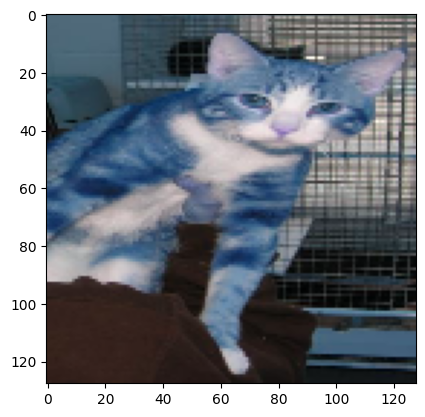

In [19]:
plt.imshow(df['image_matrix'][0])

In [20]:

x= df['image_matrix']
y= df['label']

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y= encoder.fit_transform(y.values.reshape(-1,1)).toarray()


## to be read by model
x = np.stack(x , axis=0)

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
print(x.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24946, 128, 128, 3)
(24946, 2)
(19956, 128, 128, 3)
(4990, 128, 128, 3)
(19956, 2)
(4990, 2)


In [22]:
import random
def augment_dataset(images, labels, augment_count=None):
    """
    Augments a dataset by applying random transformations.

    Parameters:
        images (numpy.ndarray): The dataset as an array of images.
        labels (numpy.ndarray): The corresponding labels for the dataset.
        augment_count (int): Number of augmented images to generate per original image.
                             If None, it generates the same number of augmented images as the original dataset.

    Returns:
        tuple: Augmented images and labels as NumPy arrays.
    """
    if augment_count is None:
        augment_count = len(images)

    augmented_images = []
    augmented_labels = []
    original_shape = images[0].shape  # Ensure all images match the original shape

    def random_rotation(image):
        angle = random.uniform(-30, 30)  # Rotate between -30 and 30 degrees
        rows, cols = image.shape[:2]
        matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        return cv2.warpAffine(image, matrix, (cols, rows))

    def random_translation(image):
        rows, cols = image.shape[:2]
        tx = random.uniform(-0.2 * cols, 0.2 * cols)  # Translate up to 20% of image width
        ty = random.uniform(-0.2 * rows, 0.2 * rows)  # Translate up to 20% of image height
        matrix = np.float32([[1, 0, tx], [0, 1, ty]])
        return cv2.warpAffine(image, matrix, (cols, rows))

    def random_scaling(image):
        scale = random.uniform(0.8, 1.2)  # Scale between 80% and 120%
        rows, cols = image.shape[:2]
        scaled = cv2.resize(image, None, fx=scale, fy=scale)
        return cv2.resize(scaled, (cols, rows))  # Resize back to original shape

    def random_flip(image):
        flip_code = random.choice([-1, 0, 1])  # Randomly flip vertically, horizontally, or both
        return cv2.flip(image, flip_code)

    def random_brightness(image):
        value = random.uniform(0.7, 1.3)  # Adjust brightness by 70% to 130%
        image = cv2.convertScaleAbs(image, alpha=value, beta=0)
        return image

    def random_noise(image):
        noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
        noisy_image = cv2.add(image, noise)
        return np.clip(noisy_image, 0, 255)

    # Apply augmentations
    for img, label in zip(images, labels):
        for _ in range(augment_count // len(images)):
            aug_img = img.copy()
            transformations = [
                random_rotation,
                random_translation,
                random_scaling,
                random_flip,
                random_brightness,
                random_noise
            ]
            random.shuffle(transformations)  # Shuffle the transformations
            for transform in transformations[:3]:  # Apply a random subset of transformations
                aug_img = transform(aug_img)
            aug_img = cv2.resize(aug_img, (original_shape[1], original_shape[0]))  # Ensure shape consistency
            augmented_images.append(aug_img)
            augmented_labels.append(label)  # Add the corresponding label

    return np.array(augmented_images), np.array(augmented_labels)

In [23]:
augmented_x_train, augmented_y_train = augment_dataset(x_train, y_train, augment_count=2 * len(x_train))

# Check the augmented dataset size
print(f"Original dataset size: {len(x_train)}")
print(f"Augmented dataset size: {len(augmented_x_train)}")
print(f"Original labels size: {len(y_train)}")
print(f"Augmented labels size: {len(augmented_y_train)}") ,

Original dataset size: 19956
Augmented dataset size: 39912
Original labels size: 19956
Augmented labels size: 39912


(None,)

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(augmented_x_train, augmented_y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.5073 - loss: 22.5312 - val_accuracy: 0.4964 - val_loss: 0.6931
Epoch 2/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5290 - loss: 0.6901 - val_accuracy: 0.5144 - val_loss: 0.6929
Epoch 3/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5416 - loss: 0.6822 - val_accuracy: 0.5102 - val_loss: 0.6937
Epoch 4/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.5625 - loss: 0.6729 - val_accuracy: 0.4968 - val_loss: 0.6959
Epoch 5/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5739 - loss: 0.6614 - val_accuracy: 0.5184 - val_loss: 0.6996
Epoch 6/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5909 - loss: 0.6429 - val_accuracy: 0.5104 - val_loss: 0.7041
Epoch 7/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6041 - loss: 0.6279 - val_accuracy: 0.5118 - val_loss: 0.7793
Epoch 8/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6277 

In [25]:
model.evaluate(x_test,y_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5083 - loss: 1.0919


[1.1142865419387817, 0.5166332721710205]

In [38]:
history.history['accuracy'][-1]

0.6622820496559143

In [26]:
y_predict = model.predict(x_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [29]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout

custom_VGG16 = VGG16(input_shape=(128,128,3),
                      include_top=False,
                      weights='imagenet',
                      pooling='avg')
custom_VGG16.trainable = False
model_VGG16 = Sequential([
    custom_VGG16,
    Flatten(),
    Dense(64,activation='relu'),
    Dense(2,activation='softmax')
                  ])
model_VGG16.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# history = model_VGG16.fit(augmented_x_train,augmented_y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))


In [30]:
model_VGG16.evaluate(x_test,y_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.4174 - loss: 12.3512


[12.28109073638916, 0.4140280485153198]